In [1]:

using DataFrames, Gadfly, RDatasets



# Scales

## 1.0 Introduction

`Aesthetics` such as `color` are visualizations of numerical or discrete values.   
A `Scale` gives us control over these numerical or discrete values.  
The following table shows an `aesthetic`, and the `scale` associated with it.
e.g. the scale associated with the `shape` aesthetic is `Scale.shape_discrete()`.  



$\begin{array}{|l|l|l|}
\hline
Aesthetic\qquad & Scale. & Guide. \\
\hline
& \quad \textit{Discrete and Continuous Scales} & \\
x & \text{x_discrete} & \text{xticks} \\
 & \text{x_continuous} & \text{xticks} \\
y & \text{y_discrete} & \text{yticks} \\
 & \text{y_continuous} & \text{yticks} \\
color & \text{color_discrete} & \text{colorkey} \\
 & \text{color_continuous} & \text{colorkey} \\
 & \text{color_none} & \text{} \\
 size & \text{size_discrete} & \text{sizekey } (tbd) \\
 & \text{size_continuous} & \text{sizekey } (tbd) \\
 & &  \\
& \qquad \textit{Discrete Scales} & \\
group & \text{group_discrete} & \text{} \\
shape & \text{shape_discrete} & \text{shapekey }(tbd)\qquad \\
xgroup & \text{xgroup} & \text{} \\
ygroup & \text{ygroup} & \text{} \\
 & &  \\
\hline
\end{array}$



We'll start with the discrete scales only category, because they have common arguments.


## 2.0 Aesthetics with Discrete Scales


In [2]:

# Data
geyser = dataset("datasets","faithful")
geyser[:g] = geyser[:Eruptions].>3.0
head(geyser)


,Eruptions,Waiting,g
1,3.6,79,true
2,1.8,54,false
3,3.333,74,true
4,2.283,62,false
5,4.533,85,true
6,2.883,55,false



### Discrete Scale Arguments
**Scale.name_discrete(labels= , levels= , order= )**

### levels and order

The `levels` and `order` argument ...

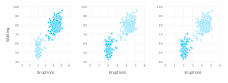

In [3]:

# Example 1

coord = Coord.cartesian(ymin=40, ymax=100)
myTheme = Theme(point_shapes=[Shape.circle, Shape.xcross])
ylab = Guide.ylabel(nothing)

pa = plot(geyser, coord, x=:Eruptions, y=:Waiting,  shape=:g, Geom.point, myTheme )

pb = plot(geyser, coord, x=:Eruptions, y=:Waiting,  shape=:g, Geom.point,
    Scale.shape_discrete(levels=[false, true]), myTheme, ylab)

pc = plot(geyser, coord, x=:Eruptions, y=:Waiting,  shape=:g, Geom.point,
    Scale.shape_discrete(order=[2, 1]), myTheme, ylab)

draw(SVG(9inch,3.3inch), hstack(pa, pb, pc))

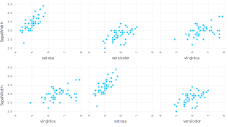

In [5]:

# Example 2

iris = dataset("datasets", "iris")
sp = unique(iris[:Species])
myTheme = Theme(plot_padding=[0mm])

pd = plot(iris, xgroup=:Species,  y=:SepalWidth,
        Geom.subplot_grid(layer(x=:SepalLength,Geom.point)), myTheme
)

pe = plot(iris, xgroup=:Species,  y=:SepalWidth,
        Geom.subplot_grid(layer(x=:SepalLength, Geom.point)), myTheme, 
    Scale.xgroup(levels=["virginica","setosa","versicolor"])
)

draw(SVG(9inch,5inch), vstack(pd,pe))

### labels

The labels argument ...   
The labels argument for `Scale.shape_discrete` and `Scale.size_discrete` will work only once a guide has been implemented for these scales (`Guide.shapekey` and `Guide.sizekey`). 

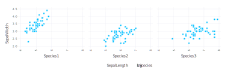

In [6]:

labelDict = Dict(i => j for (i, j) in zip(sp, "Species".*["1","2","3"]))

pf = plot(iris, xgroup=:Species, x=:SepalLength,  y=:SepalWidth,
        Geom.subplot_grid(layer(Geom.point)),
    Scale.xgroup(labels = x->labelDict[x])        
)

draw(SVG(9inch,3inch), pf)


## 3.0 Aesthetics with discrete & continuous scales 

### Introduction


Important points: 
- Gadfly allows only one scale per aesthetic 

For example, if `x=randn(10)` then you wouldn't try to plot another discrete-valued variable `x1=["Species1","Species2","Species"]` on the continuous `x`-axis (would you?). In the same way, if you map `color` to a continuous variable, you can't plot a discrete-valued variable on the same continuous `color` axis.  
Here is an example:

In [7]:
Da = vcat([DataFrame(x=rand(20), y=rand(20), z=i) for i in ["v1","v2"]]...)
pa = plot(
      layer(x = linspace(0, 1, 100), y = linspace(0, 1, 100), z = (x,y) -> x + y, Geom.contour),
      layer(Da, x=:x, y=:y, color=:z, Geom.point)
)
# Plot results in this error:
 error("Cannot `convert` an object of type String to an object of type Float64")

LoadError: [91mCannot `convert` an object of type String to an object of type Float64[39m

The error occurs because in the first layer , `z` is a continuous variable, and in the second layer, `z` is a discrete variable.  
If `z` is the same type (discrete or continuous) throughout, then the `color` axis can be controlled with e.g. `Scale.color_continuous`:

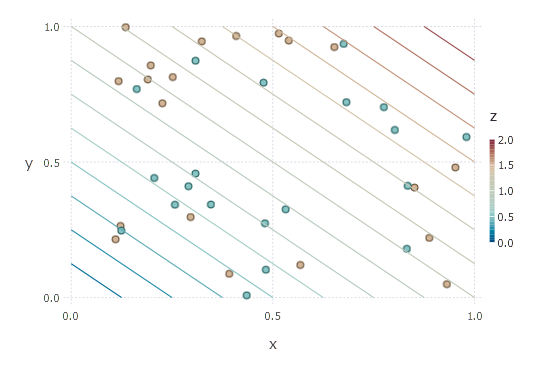

In [8]:
Db = vcat([DataFrame(x=rand(20), y=rand(20), z=i) for i in [0.5,1.5]]...)
pb = plot(
      layer(x = linspace(0, 1, 100), y = linspace(0, 1, 100), z = (x,y) -> x + y, Geom.contour),
      layer(Db, x=:x, y=:y, color=:z, Geom.point),
      Scale.color_continuous(minvalue=0.0, maxvalue=2.0)
)


### Arguments
**Scale.name_discrete(levels= , order= )**   
**Scale.name_continuous(format= , minvalue= , maxvalue= , ... )**  
There may be additional arguments for some aesthetics e.g. `colormap` for the `color` aesthetic.  
You can check by doing e.g. `methods(Scale.size_discrete)`



### levels and order

This time the effect of `levels` and `order` are visible in the `color` key.  
Also note the usage of `Scale.ycontinuous`.  


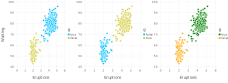

In [9]:

colorv = ["green","orange"]
                    
pc = plot(geyser, x=:Eruptions, y=:Waiting,  color=:g, Geom.point, myTheme,
  Scale.y_continuous(minvalue=40, maxvalue=100))

pd = plot(geyser, x=:Eruptions, y=:Waiting,  color=:g, Geom.point, myTheme, ylab,
  Scale.y_continuous(minvalue=40, maxvalue=100),
  Scale.color_discrete(levels=[false,true]) )

pe = plot(geyser, x=:Eruptions, y=:Waiting,  color=:g, Geom.point, myTheme, ylab,
  Scale.y_continuous(minvalue=40, maxvalue=100),
  Scale.color_discrete_manual(colorv...) )


draw(SVG(9inch,3.3inch), hstack(pc,pd, pe))


### format, minvalue and maxvalue

format can be$\quad$  `:plain, :scientific, :engineering, :auto`

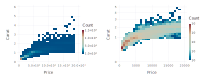

In [10]:

Diamonds = dataset("ggplot2","diamonds")

pf = plot(Diamonds, x=:Price, y=:Carat, Geom.histogram2d(xbincount=25, ybincount=25),
    Scale.x_continuous(format=:engineering), 
#    Scale.color_continuous() # currently no format arg
)

pg = plot(Diamonds, x=:Price, y=:Carat, Geom.histogram2d(xbincount=25, ybincount=25),
    Scale.color_log10(minvalue=1.0, maxvalue=10^4),
    Scale.x_continuous(format=:plain), 
    Scale.y_sqrt(labels=x -> @sprintf("%i", x^2)),
    Guide.yticks(ticks=sqrt.([0:5;]))
)
draw(SVG(8inch,3.3inch), hstack(pf,pg))


#### continuous scale transformations (above): `_sqrt`, `_log`, `_log2`, `_log10`, `_asinh`   


### colormap

A `colormap` is a function which takes a value of 0-1 and converts it to a color.   
You can either make a custom `colormap` using the Gadfly helper function `Scale.lab_gradient()`,  
or use a `colormap` from a suitable package such as `ColorSchemes`.


In [11]:
 using Colors 

In [24]:
# Custom continuous Palette
cs = [RGB(r,g,b)  for (r,g,b) in [(0.18,0.31,0.93),(0.64,0.72,0.96),(1.0,1.0,0.91),(0.96,0.86,0.28),(0.82,0.13,0.16)] ]
cPalette = Scale.lab_gradient(cs...)


(::f) (generic function with 1 method)

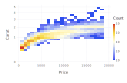

In [21]:
ph = plot(Diamonds, x=:Price, y=:Carat, Geom.histogram2d(xbincount=25, ybincount=25),
    Scale.color_log10(colormap=cPalette, minvalue=1.0, maxvalue=10^4),
    Scale.x_continuous(format=:plain), 
    Scale.y_sqrt(labels=x -> @sprintf("%i", x^2)),
    Guide.yticks(ticks=sqrt.([0:5;]))
)
draw(SVG(5inch,3.3inch),ph)

In [14]:
using ColorSchemes

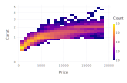

In [22]:
pi = plot(Diamonds, x=:Price, y=:Carat, Geom.histogram2d(xbincount=25, ybincount=25),
    Scale.color_log10(colormap=c->get(ColorSchemes.plasma, c)),
    Scale.x_continuous(format=:plain), 
    Scale.y_sqrt(labels=x -> @sprintf("%i", x^2)),
    Guide.yticks(ticks=sqrt.([0:5;]))
)
draw(SVG(5inch,3.3inch),pi)

## 4.0 Future development

- `Scale.color_continuous` needs a `format` argument 
- Investigate tidying `Scale.color_discrete` and `Scale.color_discrete_manual` (2 functions seems unnecessary)